In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
import chart_studio.plotly as py
cf.go_offline()
%matplotlib inline
import pandas_datareader.data as web
import datetime as dt

# MACHINE LEARNING
from sklearn.model_selection import train_test_split
# LOGISTIC REGRESSION MODEL IMPORTS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#LINEAR REGRESSION MODEL IMPORTS
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#KNN MODEL IMPORTS
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#DECISION TREE IMPORTS
from sklearn.tree import DecisionTreeClassifier
#RANDOM FOREST IMPORTS
from sklearn.ensemble import RandomForestClassifier
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
# SPY DATA
spy0 = web.DataReader('SPY', 'yahoo', start='1993-01-28', end='2022-05-13')
lqd = web.DataReader('LQD', 'yahoo', start='1993-01-28', end='2022-05-13')

In [3]:
spy0.drop("Adj Close", axis = 1, inplace = True)
lqd.drop("Adj Close", axis = 1, inplace = True)

In [4]:
lqd.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,111.320000,110.190002,110.419998,111.199997,17185900.0
2022-05-10,112.360001,111.570000,112.080002,111.669998,25650800.0
2022-05-11,112.459999,111.040001,111.199997,112.190002,25053500.0
2022-05-12,112.879997,112.160004,112.459999,112.239998,22156400.0
2022-05-13,112.160004,111.419998,112.070000,111.650002,16107900.0


In [5]:
# Current Day Close Return: Continuous (OUTPUT TO PREDICT)
output = pd.DataFrame((spy0["Close"]-spy0["Open"])/(spy0["Open"])).shift(-1)
output.columns = ["Return"]
output.tail()

,Return
Date,
2022-05-09,-0.013350
2022-05-10,-0.013365
2022-05-11,0.007628
2022-05-12,0.012629
2022-05-13,NaN


In [6]:
# Current Day Close Return: Categorical (OUTPUT TO PREDICT) (1 is positive or flat, 0 is negative)
outputc = pd.DataFrame(np.where(output.eval("Return >= 0"),1,0))
outputc.columns = ["Return C"]
outputc.index = output.index
outputc.tail()

,Return C
Date,
2022-05-09,0
2022-05-10,0
2022-05-11,1
2022-05-12,1
2022-05-13,0


In [7]:
# MODIFIED OUTCOME: Continuous (OUTPUT TO PREDICT)
moutput = pd.DataFrame(((spy0["High"]-spy0["Open"])-(spy0["Open"]-spy0["Low"]))/spy0["Open"]).shift(-1)
moutput.columns = ["Return"]
moutput.tail()

,Return
Date,
2022-05-09,-0.019976
2022-05-10,-0.000352
2022-05-11,0.005676
2022-05-12,0.013536
2022-05-13,NaN


In [8]:
# MODIFIED OUTCOME: Categorical (OUTPUT TO PREDICT) (1 is positive or flat, 0 is negative)
moutputc = pd.DataFrame(np.where(moutput.eval("Return >= 0"),1,0))
moutputc.index = moutput.index
moutputc.tail()

,0
Date,
2022-05-09,0
2022-05-10,0
2022-05-11,1
2022-05-12,1
2022-05-13,0


In [9]:
# Current Day LQD OHLCV R
cdr = pd.DataFrame(lqd.pct_change())
cdr.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.001793,-0.004247,-0.003879,0.003520,0.105174
2022-05-10,0.009342,0.012524,0.015034,0.004227,0.492549
2022-05-11,0.000890,-0.004750,-0.007852,0.004657,-0.023286
2022-05-12,0.003735,0.010086,0.011331,0.000446,-0.115637
2022-05-13,-0.006378,-0.006598,-0.003468,-0.005257,-0.272991


In [10]:
# Previous Day LQD OHLCV Return
pdr = pd.DataFrame(lqd.pct_change()).shift(+1)
pdr.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.008623,-0.002074,-0.014141,-0.008500,-0.547386
2022-05-10,-0.001793,-0.004247,-0.003879,0.003520,0.105174
2022-05-11,0.009342,0.012524,0.015034,0.004227,0.492549
2022-05-12,0.000890,-0.004750,-0.007852,0.004657,-0.023286
2022-05-13,0.003735,0.010086,0.011331,0.000446,-0.115637


In [11]:
# 4 period moving average
fpmaspy = lqd.rolling(window=4).mean()
fpmaspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,112.297499,110.880001,111.525000,111.817499,25333475.0
2022-05-10,111.922499,110.827501,111.447500,111.359999,23186000.0
2022-05-11,111.914999,110.865002,111.137499,111.467499,20860150.0
2022-05-12,112.254999,111.240002,111.539999,111.824999,22511650.0
2022-05-13,112.465000,111.547501,111.952499,111.937500,22242150.0


In [12]:
# 12 period moving average
tpmaspy = lqd.rolling(window=12).mean()
tpmaspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,113.374165,112.274167,112.794167,112.837500,2.197048e+07
2022-05-10,113.261665,112.170834,112.708333,112.691666,2.244743e+07
2022-05-11,113.061665,111.922501,112.472500,112.484166,2.268010e+07
2022-05-12,112.862499,111.729167,112.240833,112.285833,2.263519e+07
2022-05-13,112.641666,111.558334,112.046666,112.130000,2.235867e+07


In [13]:
# MACD (Moving Average Convergence Divergence) between OHLC and vol and the 4 MAs as a %
fmacdspy = (lqd-fpmaspy)/(fpmaspy)
fmacdspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.008705,-0.006223,-0.009908,-0.005522,-0.321613
2022-05-10,0.003909,0.006700,0.005675,0.002784,0.106306
2022-05-11,0.004870,0.001578,0.000562,0.006482,0.201022
2022-05-12,0.005568,0.008270,0.008248,0.003711,-0.015781
2022-05-13,-0.002712,-0.001143,0.001050,-0.002568,-0.275794


In [14]:
# MACD (Moving Average Convergence Divergence) between OHLC and vol and the 12 MAs as a %
tmacdspy = (lqd-tpmaspy)/(tpmaspy)
tmacdspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.018118,-0.018563,-0.021049,-0.014512,-0.217773
2022-05-10,-0.007961,-0.005356,-0.005575,-0.009066,0.142705
2022-05-11,-0.005322,-0.007885,-0.011314,-0.002615,0.104647
2022-05-12,0.000155,0.003856,0.001953,-0.000408,-0.021153
2022-05-13,-0.004276,-0.001240,0.000208,-0.004281,-0.279568


In [15]:
# MACD (Moving Average Convergence Divergence) between 4 MAs and the 12 MAs as a % of 12ma
ftmaspy_ = (fpmaspy - tpmaspy)/(tpmaspy)
ftmaspy_.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.009497,-0.012418,-0.011252,-0.009040,0.153069
2022-05-10,-0.011824,-0.011976,-0.011187,-0.011817,0.032902
2022-05-11,-0.010142,-0.009448,-0.011870,-0.009038,-0.080244
2022-05-12,-0.005383,-0.004378,-0.006244,-0.004104,-0.005458
2022-05-13,-0.001568,-0.000097,-0.000840,-0.001717,-0.005211


In [16]:
# MACD (Moving Average Convergence Divergence) between 4 MAs and the 12 MAs as a %
ftmaspy = (fpmaspy - tpmaspy)/((fpmaspy+tpmaspy)/2)
ftmaspy.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2022-05-09,-0.009542,-0.012495,-0.011316,-0.009081,0.142187
2022-05-10,-0.011894,-0.012048,-0.011250,-0.011887,0.032370
2022-05-11,-0.010194,-0.009493,-0.011940,-0.009079,-0.083599
2022-05-12,-0.005397,-0.004388,-0.006264,-0.004113,-0.005473
2022-05-13,-0.001570,-0.000097,-0.000841,-0.001718,-0.005225


In [17]:
# LQD and SPY COMBO DF:
lqd0 = pd.concat([output,outputc,moutput, moutputc,cdr, pdr,fmacdspy,tmacdspy, ftmaspy_,ftmaspy], axis = 1)
lqd0.columns = ["Predict R","Predict RC","Predict MR","Predict MRC",
               "LQD HR","LQD LR","LQD OR","LQD CR","LQD VR","LQD T-1V",
              "LQD T-1CR","LQD T-1OR","LQD T-1HR","LQD T-1LR","LQDH-4","LQDL-4","LQDO-4","LQDC-4","LQDV-4",
              "LQDH-12","LQDL-12","LQDO-12","LQDC-12","LQDV-12",
               "LQDH1 4-12","LQDL1 4-12","LQDO1 4-12","LQDC1 4-12","LQDV1 4-12",
               "LQDH 4-12","LQDL 4-12","LQDO 4-12","LQDC 4-12","LQDV 4-12"]
lqd0.tail()

,Predict R,Predict RC,Predict MR,Predict MRC,LQD HR,LQD LR,LQD OR,LQD CR,LQD VR,LQD T-1V,...,LQDH1 4-12,LQDL1 4-12,LQDO1 4-12,LQDC1 4-12,LQDV1 4-12,LQDH 4-12,LQDL 4-12,LQDO 4-12,LQDC 4-12,LQDV 4-12
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-09,-0.013350,0,-0.019976,0,-0.001793,-0.004247,-0.003879,0.003520,0.105174,-0.008623,...,-0.009497,-0.012418,-0.011252,-0.009040,0.153069,-0.009542,-0.012495,-0.011316,-0.009081,0.142187
2022-05-10,-0.013365,0,-0.000352,0,0.009342,0.012524,0.015034,0.004227,0.492549,-0.001793,...,-0.011824,-0.011976,-0.011187,-0.011817,0.032902,-0.011894,-0.012048,-0.011250,-0.011887,0.032370
2022-05-11,0.007628,1,0.005676,1,0.000890,-0.004750,-0.007852,0.004657,-0.023286,0.009342,...,-0.010142,-0.009448,-0.011870,-0.009038,-0.080244,-0.010194,-0.009493,-0.011940,-0.009079,-0.083599
2022-05-12,0.012629,1,0.013536,1,0.003735,0.010086,0.011331,0.000446,-0.115637,0.000890,...,-0.005383,-0.004378,-0.006244,-0.004104,-0.005458,-0.005397,-0.004388,-0.006264,-0.004113,-0.005473
2022-05-13,NaN,0,NaN,0,-0.006378,-0.006598,-0.003468,-0.005257,-0.272991,0.003735,...,-0.001568,-0.000097,-0.000840,-0.001717,-0.005211,-0.001570,-0.000097,-0.000841,-0.001718,-0.005225


In [18]:
######################################

In [19]:
# Sentiment Data: 01/29/1993 - 05/12/2022
df0 = pd.read_excel("sentiment.xls",sheet_name = "SENTIMENT", skiprows = 294)
df00 = df0.drop(df0.index[1527:]).drop(df0.columns[4:],axis = 1)
df00.columns=["Date","Bull","Neutral","Bear"]
sdf = df00.set_index("Date")
sdf.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.158371,0.357466,0.484163
2022-04-21,0.188679,0.372642,0.438679
2022-04-28,0.164384,0.242009,0.593607
2022-05-05,0.268722,0.202643,0.528634
2022-05-12,0.243243,0.266409,0.490347


In [20]:
# Bull, neutral, bear Current Day Return
cdrs = pd.DataFrame(sdf.pct_change())
cdrs.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.359149,0.054223,0.170061
2022-04-21,0.191373,0.042454,-0.093944
2022-04-28,-0.128764,-0.350559,0.353169
2022-05-05,0.634721,-0.162663,-0.109455
2022-05-12,-0.094815,0.314672,-0.072426


In [21]:
# Bull, neutral, bear Previous Day Return
pdrs = pd.DataFrame(sdf.pct_change()).shift(+1)
pdrs.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.224924,-0.164410,0.502724
2022-04-21,-0.359149,0.054223,0.170061
2022-04-28,0.191373,0.042454,-0.093944
2022-05-05,-0.128764,-0.350559,0.353169
2022-05-12,0.634721,-0.162663,-0.109455


In [22]:
# 4 period moving average
fpma = sdf.rolling(window=4).mean()
fpma.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.263095,0.354951,0.381954
2022-04-21,0.228254,0.368746,0.402999
2022-04-28,0.189640,0.327799,0.482561
2022-05-05,0.195039,0.293690,0.511271
2022-05-12,0.216257,0.270926,0.512817


In [23]:
# 12 period moving average
tpma = sdf.rolling(window=12).mean()
tpma.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.248937,0.318809,0.432255
2022-04-21,0.245379,0.329927,0.424694
2022-04-28,0.237000,0.325219,0.437780
2022-05-05,0.239095,0.308630,0.452275
2022-05-12,0.243324,0.299532,0.457143


In [24]:
# MACD (Moving Average Convergence Divergence) between Bull, Neutral, Bear and the 4 MAs
fmacdsen = sdf-fpma
fmacdsen.head()

,Bull,Neutral,Bear
Date,,,
1993-01-29,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN
1993-02-12,NaN,NaN,NaN
1993-02-19,0.0175,-0.0525,0.0350
1993-02-26,-0.0875,0.0100,0.0775


In [25]:
# MACD (Moving Average Convergence Divergence) between Bull, Neutral, Bear and the 12 MAs
tmacdsen = sdf-tpma
tmacdsen.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,-0.090565,0.038657,0.051908
2022-04-21,-0.056700,0.042715,0.013985
2022-04-28,-0.072616,-0.083210,0.155827
2022-05-05,0.029627,-0.105987,0.076359
2022-05-12,-0.000081,-0.033123,0.033204


In [26]:
# MACD (Moving Average Convergence Divergence) between 4 MAs and the 12 MAs
ftmasen = fpma - tpma
ftmasen.tail()

,Bull,Neutral,Bear
Date,,,
2022-04-14,0.014158,0.036142,-0.050301
2022-04-21,-0.017124,0.038819,-0.021694
2022-04-28,-0.047360,0.002580,0.044780
2022-05-05,-0.044056,-0.014940,0.058996
2022-05-12,-0.027067,-0.028607,0.055674


In [27]:
# SENTIMENT COMBO DF:
sentiment = pd.concat([sdf,cdrs,pdrs,fpma,tpma,fmacdsen,tmacdsen,ftmasen], axis = 1)
sentiment.columns = ["Bull","Neutral","Bear","Bull R","Neutral R","Bear R",
                     "Bull T-1R","Neutral T-1R","Bear T-1R","Bull 4","Neutral 4","Bear 4",
                     "Bull 12","Neutral 12","Bear 12","Bull-4","Neutral-4","Bear-4"
                    ,"Bull-12","Neutral-12","Bear-12","Bull 4-12","Neutral 4-12","Bear 4-12"]
sentiment.tail()

,Bull,Neutral,Bear,Bull R,Neutral R,Bear R,Bull T-1R,Neutral T-1R,Bear T-1R,Bull 4,...,Bear 12,Bull-4,Neutral-4,Bear-4,Bull-12,Neutral-12,Bear-12,Bull 4-12,Neutral 4-12,Bear 4-12
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-14,0.158371,0.357466,0.484163,-0.359149,0.054223,0.170061,-0.224924,-0.164410,0.502724,0.263095,...,0.432255,-0.104724,0.002515,0.102209,-0.090565,0.038657,0.051908,0.014158,0.036142,-0.050301
2022-04-21,0.188679,0.372642,0.438679,0.191373,0.042454,-0.093944,-0.359149,0.054223,0.170061,0.228254,...,0.424694,-0.039575,0.003896,0.035680,-0.056700,0.042715,0.013985,-0.017124,0.038819,-0.021694
2022-04-28,0.164384,0.242009,0.593607,-0.128764,-0.350559,0.353169,0.191373,0.042454,-0.093944,0.189640,...,0.437780,-0.025256,-0.085790,0.111046,-0.072616,-0.083210,0.155827,-0.047360,0.002580,0.044780
2022-05-05,0.268722,0.202643,0.528634,0.634721,-0.162663,-0.109455,-0.128764,-0.350559,0.353169,0.195039,...,0.452275,0.073683,-0.091047,0.017363,0.029627,-0.105987,0.076359,-0.044056,-0.014940,0.058996
2022-05-12,0.243243,0.266409,0.490347,-0.094815,0.314672,-0.072426,0.634721,-0.162663,-0.109455,0.216257,...,0.457143,0.026986,-0.004517,-0.022470,-0.000081,-0.033123,0.033204,-0.027067,-0.028607,0.055674


In [28]:
######################################

In [29]:
# COMBINING BOTH LQD,SPY AND SENTIMENT DFs

combo0 = pd.concat([lqd0,sentiment],axis = 1)
combo = combo0.dropna()
combo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2002-08-15 to 2022-05-12
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Predict R     1008 non-null   float64
 1   Predict RC    1008 non-null   float64
 2   Predict MR    1008 non-null   float64
 3   Predict MRC   1008 non-null   float64
 4   LQD HR        1008 non-null   float64
 5   LQD LR        1008 non-null   float64
 6   LQD OR        1008 non-null   float64
 7   LQD CR        1008 non-null   float64
 8   LQD VR        1008 non-null   float64
 9   LQD T-1V      1008 non-null   float64
 10  LQD T-1CR     1008 non-null   float64
 11  LQD T-1OR     1008 non-null   float64
 12  LQD T-1HR     1008 non-null   float64
 13  LQD T-1LR     1008 non-null   float64
 14  LQDH-4        1008 non-null   float64
 15  LQDL-4        1008 non-null   float64
 16  LQDO-4        1008 non-null   float64
 17  LQDC-4        1008 non-null   float64
 18  LQDV-4    

In [30]:
######################################

<AxesSubplot:title={'center':'Distribution of next day modified returns'}, xlabel='Predict MR', ylabel='Count'>

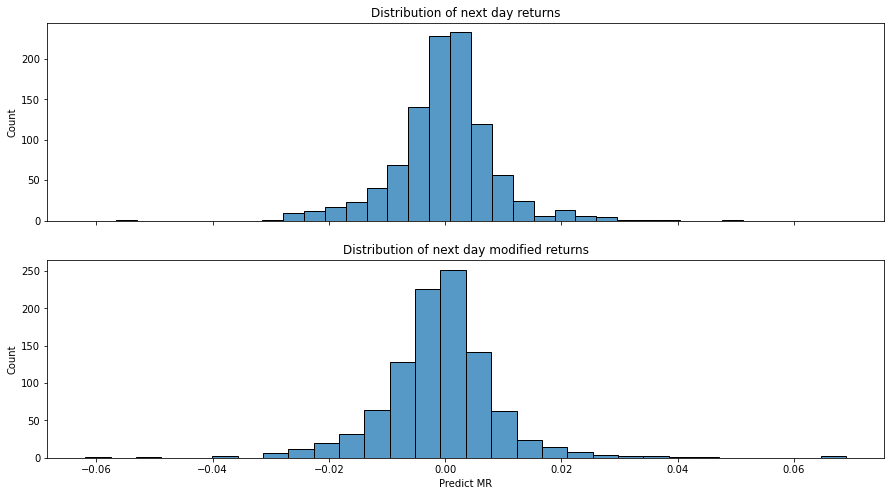

In [31]:
# PLOTS TO ANALYZE DATA
fig,axes = plt.subplots(ncols = 1, nrows =2, sharex = True, figsize = (15,8))
axes[0].set_title("Distribution of next day returns")
sns.histplot(ax = axes[0],x = combo["Predict R"], bins = 30)

axes[1].set_title("Distribution of next day modified returns")
sns.histplot(ax = axes[1],x = combo["Predict MR"], bins = 30)

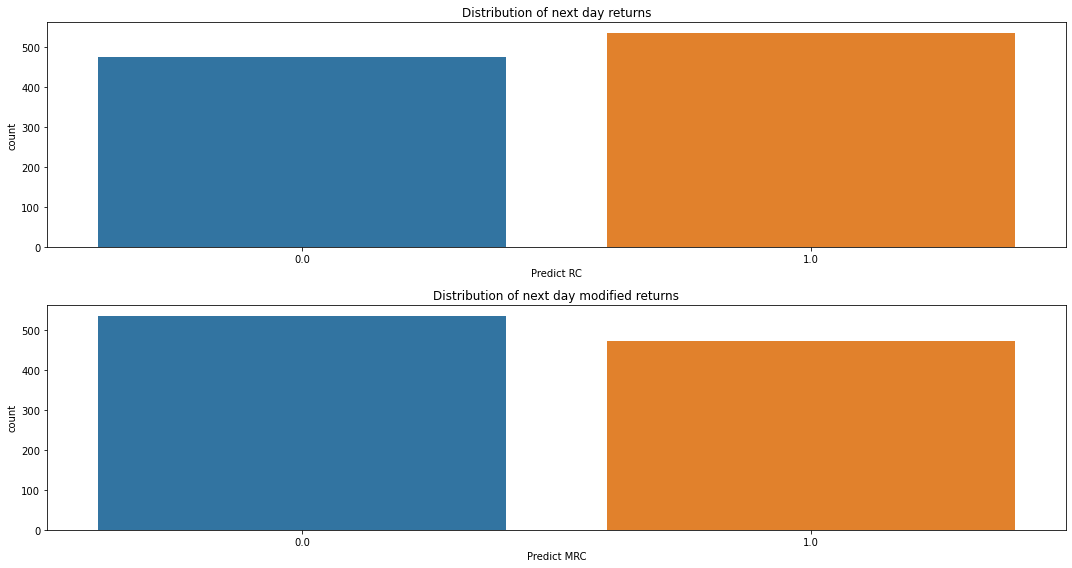

In [32]:
fig,axes = plt.subplots(ncols = 1, nrows =2, figsize = (15,8))
axes[0].set_title("Distribution of next day returns")
sns.countplot(ax = axes[0],x = combo["Predict RC"])

axes[1].set_title("Distribution of next day modified returns")
sns.countplot(ax = axes[1],x = combo["Predict MRC"])
plt.tight_layout()

In [33]:
combo.corr()["Predict R"].nlargest(10)

Predict R      1.000000
Predict MR     0.837868
Predict RC     0.694762
Predict MRC    0.609581
LQDL 4-12      0.116174
LQDL1 4-12     0.112972
LQD HR         0.111427
LQDC-12        0.103032
LQDL-12        0.100490
LQDC 4-12      0.098070
Name: Predict R, dtype: float64

In [34]:
combo.corr()["Predict RC"].nlargest(10)

Predict RC     1.000000
Predict R      0.694762
Predict MRC    0.662835
Predict MR     0.576428
Bull-12        0.081189
Bull-4         0.069721
LQD OR         0.063386
Bull R         0.056242
LQDO-4         0.053353
LQDL-4         0.048557
Name: Predict RC, dtype: float64

In [35]:
combo.corr()["Predict MR"].nlargest(10)

Predict MR     1.000000
Predict R      0.837868
Predict MRC    0.677453
Predict RC     0.576428
LQD OR         0.173306
LQDL-4         0.159506
LQDO-4         0.138582
LQDL-12        0.138448
LQD LR         0.136554
LQDC-4         0.131815
Name: Predict MR, dtype: float64

In [36]:
combo.corr()["Predict MRC"].nlargest(10)

Predict MRC    1.000000
Predict MR     0.677453
Predict RC     0.662835
Predict R      0.609581
LQD OR         0.079144
LQD LR         0.065525
LQDC-4         0.061749
LQDL-4         0.061118
LQD CR         0.057358
LQD HR         0.056547
Name: Predict MRC, dtype: float64

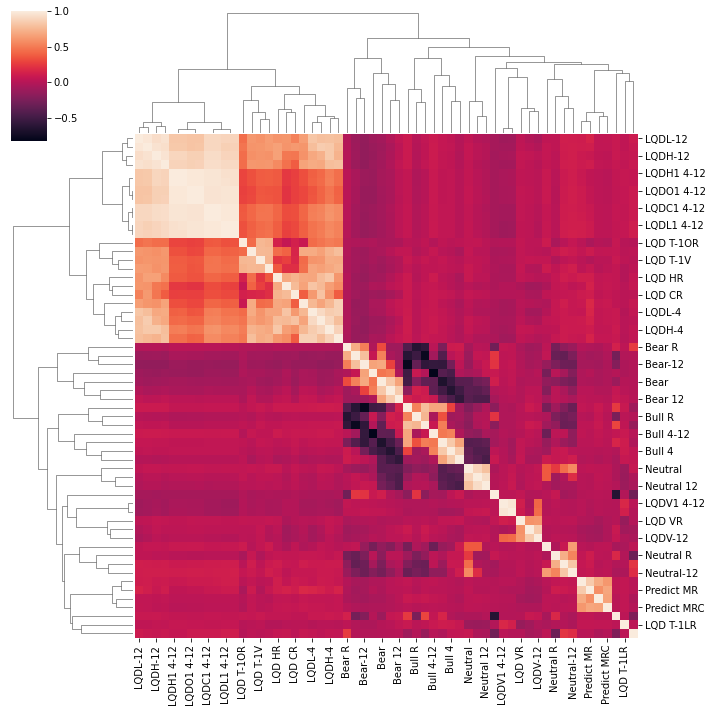

In [37]:
sns.clustermap(combo.corr())

<AxesSubplot:>

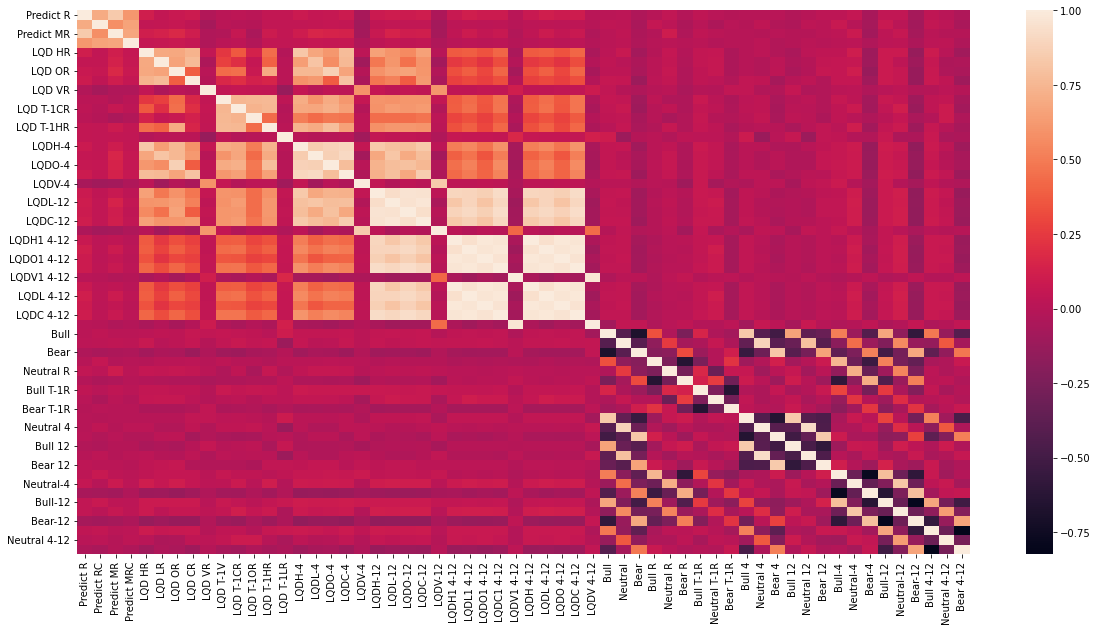

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(combo.corr())

In [39]:
######################################

In [40]:
## LOGISTIC REGRESSION MODEL1: LOGRM1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.50      0.36      0.42       138
         1.0       0.57      0.70      0.63       165

    accuracy                           0.54       303
   macro avg       0.53      0.53      0.52       303
weighted avg       0.54      0.54      0.53       303

[[ 49  89]
 [ 49 116]]


In [41]:
## LOGISTIC REGRESSION MODEL2: LOGRM2
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict MRC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.51      0.80      0.62       157
         1.0       0.43      0.16      0.24       146

    accuracy                           0.49       303
   macro avg       0.47      0.48      0.43       303
weighted avg       0.47      0.49      0.44       303

[[125  32]
 [122  24]]


In [42]:
## LINEAR REGRESSION MODEL1: LRM1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict R"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
coef = pd.DataFrame(lr.coef_, X_train.columns, columns = ["Coef"])
# coef

<AxesSubplot:xlabel='Predict R'>

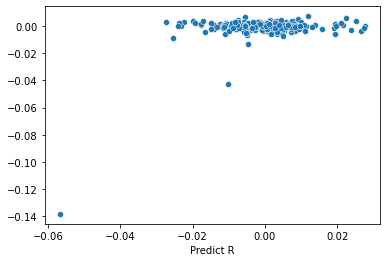

In [43]:
# SCATTER OF LRM1 AND ACTUAL
sns.scatterplot(y = predictions, x = y_test)

In [44]:
# LRM1 METRICS 
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("RRMSE:",(np.sqrt(metrics.mean_squared_error(y_test,predictions)))/abs(y_test.mean()))

MAE: 0.006840585592577034
MSE: 0.00010459805134324415
RMSE: 0.010227318873646415
RRMSE: 21.039073965916323


In [45]:
## LINEAR REGRESSION MODEL2: LRM2
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict MR"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
coef = pd.DataFrame(lr.coef_, X_train.columns, columns = ["Coef"])
# coef

<AxesSubplot:xlabel='Predict MR'>

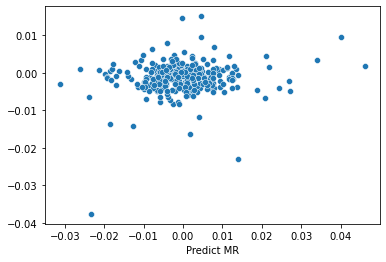

In [46]:
# SCATTER OF LRM2 AND ACTUAL
sns.scatterplot(y = predictions, x = y_test)

In [47]:
# LRM2 METRICS 
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("RRMSE:",(np.sqrt(metrics.mean_squared_error(y_test,predictions)))/abs(y_test.mean()))

MAE: 0.00700637806007094
MSE: 9.37464655548894e-05
RMSE: 0.009682275845837559
RRMSE: 35.69223187707025


In [48]:
# KNN MODEL 1: KNN1
scaler = StandardScaler()
scaler.fit(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
scaled_features = scaler.transform(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
combo_feat = pd.DataFrame(scaled_features, columns = combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1).columns)
X = combo_feat
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.45      0.47      0.46       139
         1.0       0.53      0.51      0.52       164

    accuracy                           0.49       303
   macro avg       0.49      0.49      0.49       303
weighted avg       0.49      0.49      0.49       303

[[66 73]
 [81 83]]


Text(0, 0.5, 'Error Rate')

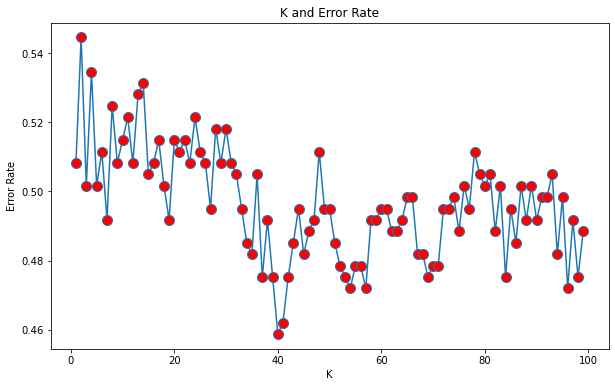

In [49]:
# KNN1 ELBOW METHOD ADJUSTMENT OF K
error_rate = []
for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    p1 = knn.predict(X_test)
    error_rate.append(np.mean(p1 != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error_rate, marker = "o", markerfacecolor= "red", markersize = 10)
plt.title("K and Error Rate")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [50]:
# KNN1 Adjusted with K = 40
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40       139
         1.0       0.56      0.71      0.63       164

    accuracy                           0.54       303
   macro avg       0.53      0.53      0.52       303
weighted avg       0.53      0.54      0.52       303

[[ 47  92]
 [ 47 117]]


In [51]:
# KNN MODEL 2: KNN2
scaler = StandardScaler()
scaler.fit(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
scaled_features = scaler.transform(combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1))
combo_feat = pd.DataFrame(scaled_features, columns = combo.drop(["Predict RC","Predict MRC","Predict R","Predict MR"],axis = 1).columns)
X = combo_feat
y = combo["Predict MRC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53       155
         1.0       0.48      0.44      0.46       148

    accuracy                           0.50       303
   macro avg       0.49      0.49      0.49       303
weighted avg       0.49      0.50      0.49       303

[[85 70]
 [83 65]]


Text(0, 0.5, 'Error Rate')

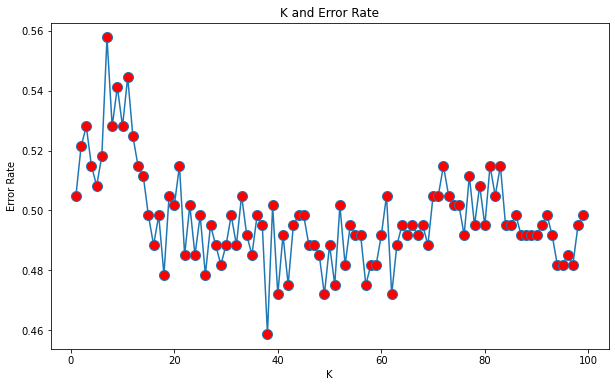

In [52]:
# KNN2 ELBOW METHOD ADJUSTMENT OF K
error_rate = []
for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    p1 = knn.predict(X_test)
    error_rate.append(np.mean(p1 != y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error_rate, marker = "o", markerfacecolor= "red", markersize = 10)
plt.title("K and Error Rate")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [53]:
# KNN2 Adjusted with K = 39
knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(X_train,y_train)
p1 = knn.predict(X_test)
print(classification_report(y_test,p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.51      0.68      0.58       155
         1.0       0.48      0.30      0.37       148

    accuracy                           0.50       303
   macro avg       0.49      0.49      0.48       303
weighted avg       0.49      0.50      0.48       303

[[106  49]
 [103  45]]


In [54]:
# DECISION TREE 1: DT1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
p1 = dtree.predict(X_test)
print(confusion_matrix(y_test,p1))
print(classification_report(y_test,p1))

[[70 84]
 [77 72]]
              precision    recall  f1-score   support

         0.0       0.48      0.45      0.47       154
         1.0       0.46      0.48      0.47       149

    accuracy                           0.47       303
   macro avg       0.47      0.47      0.47       303
weighted avg       0.47      0.47      0.47       303



In [55]:
# RANDOM FOREST 1: RF1
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)
print(confusion_matrix(y_test,p2))
print(classification_report(y_test,p2))

[[ 53 101]
 [ 55  94]]
              precision    recall  f1-score   support

         0.0       0.49      0.34      0.40       154
         1.0       0.48      0.63      0.55       149

    accuracy                           0.49       303
   macro avg       0.49      0.49      0.48       303
weighted avg       0.49      0.49      0.47       303



In [56]:
# DECISION TREE 2: DT2
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict MRC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
p1 = dtree.predict(X_test)
print(confusion_matrix(y_test,p1))
print(classification_report(y_test,p1))

[[105  54]
 [ 82  62]]
              precision    recall  f1-score   support

         0.0       0.56      0.66      0.61       159
         1.0       0.53      0.43      0.48       144

    accuracy                           0.55       303
   macro avg       0.55      0.55      0.54       303
weighted avg       0.55      0.55      0.55       303



In [57]:
# RANDOM FOREST 2: RF2
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)
print(confusion_matrix(y_test,p2))
print(classification_report(y_test,p2))

[[ 96  63]
 [104  40]]
              precision    recall  f1-score   support

         0.0       0.48      0.60      0.53       159
         1.0       0.39      0.28      0.32       144

    accuracy                           0.45       303
   macro avg       0.43      0.44      0.43       303
weighted avg       0.44      0.45      0.43       303



In [58]:
# Support Vector Machine 1: SVM1
X = combo.drop(["Predict RC","Predict R","Predict MRC","Predict MR"],axis = 1)
y = combo["Predict RC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC()
model.fit(X_train,y_train)
p1 = model.predict(X_test)
print(classification_report(y_test, p1))
print(confusion_matrix(y_test,p1))

              precision    recall  f1-score   support

         0.0       0.53      0.38      0.44       136
         1.0       0.59      0.72      0.65       167

    accuracy                           0.57       303
   macro avg       0.56      0.55      0.54       303
weighted avg       0.56      0.57      0.56       303

[[ 52  84]
 [ 47 120]]


In [59]:
# Grid Search
param_grid = {"C":[.1,1,10,100,1000],"gamma":[1,.1,.01,.001,.0001]}
grid = GridSearchCV(SVC(), param_grid,verbose = 3)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.525 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.525 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.518 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.518 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.511 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.525 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.518 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.518 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.518 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.518 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.525 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.525 total time=   0.1s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.532 total time=   0.1s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.532 total time=   0.3s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.482 total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.532 total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.589 total time=   0.2s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.525 total time=   0.3s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.496 total time=   0.4s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.440 total time=   0.1s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.525 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.496 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.546 total time=   0.1s
[CV 4/5] END ...............